In [1]:
import matplotlib.pyplot as plt
import neuropacks as packs
import numpy as np
import os

from pratplot.ellipse import plot_cov_ellipse
from noise_correlations import analysis, utils 

%matplotlib inline

In [2]:
base_path = '/Volumes/pss/data'

# RET 2

In [3]:
ret2_path = os.path.join(base_path, 'ret2/200114_fov1_data.mat')
ret2 = packs.RET2(data_path=ret2_path)

In [4]:
X = ret2.get_response_matrix(cells='tuned', response='max')
stimuli = ret2.angles
unique_stimuli = ret2.unique_angles

In [5]:
tuning_curves = utils.get_tuning_curve(X, stimuli, aggregator=np.mean)

In [8]:
ccycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

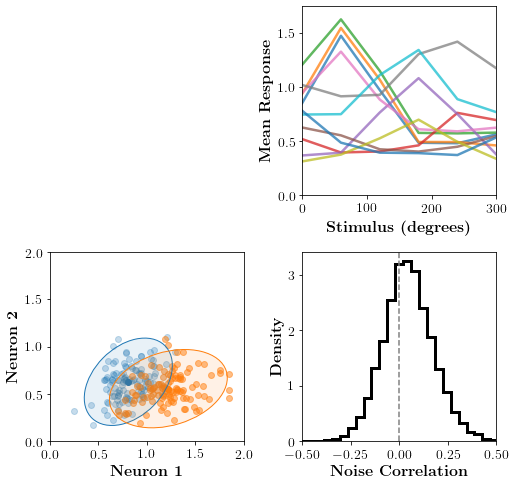

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axes[0, 0].axis('off')

tcax = axes[0, 1]
# Tuning curves
for idx, tuning_curve in enumerate(tuning_curves):
    if idx % 5 == 0:
        tcax.plot(unique_stimuli,
                  tuning_curve,
                  linewidth=2.5,
                  alpha=0.75)

tcax.set_xlim([0, 300])
tcax.set_ylim([0, 1.75])       
tcax.set_xticks([0, 100, 200, 300])
tcax.set_yticks([0, 0.5, 1.0, 1.5])
tcax.set_xlabel(r'\textbf{Stimulus (degrees)}', fontsize=16)
tcax.set_ylabel(r'\textbf{Mean Response}', fontsize=16)

# Plot example responses
resax = axes[1, 0]

stim1 = 0
stim2 = 60
neuron1 = 32
neuron2 = 25
X1 = X[stimuli == stim1][:, [neuron1, neuron2]]
X2 = X[stimuli == stim2][:, [neuron1, neuron2]]

resax.scatter(X1[:, 0],
              X1[:, 1],
              color='C0',
              alpha=0.25)
resax = plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=np.mean(X1, axis=0),
    scale=5.,
    facecolor=[x / 255 for x in list(bytes.fromhex(ccycle[0][1:]))] + [0.1],
    edgecolor=[x / 255 for x in list(bytes.fromhex(ccycle[0][1:]))] + [1.0],
    ax=resax
)
resax = plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=np.mean(X2, axis=0),
    scale=5.,
    facecolor=[x / 255 for x in list(bytes.fromhex(ccycle[1][1:]))] + [0.1],
    edgecolor=[x / 255 for x in list(bytes.fromhex(ccycle[1][1:]))] + [1.0],
    ax=resax
)
resax.scatter(X2[:, 0],
              X2[:, 1],
              color='C1',
              alpha=0.5)
resax.set_xlim([0., 2])
resax.set_ylim(resax.get_xlim())
resax.set_xlabel(r'\textbf{Neuron 1}', fontsize=16)
resax.set_ylabel(r'\textbf{Neuron 2}', fontsize=16)

# Noise correlations
ncax = axes[1, 1]
noise_corrs = analysis.all_correlations(X, stimuli)
bins = np.linspace(-1, 1, 50)
ncax.hist(noise_corrs,
          bins=bins,
          density=True,
          color='black',
          histtype='step',
          linewidth=3)
ncax.axvline(0, linestyle='--', color='grey')
ncax.set_xlim([-0.5, 0.5])

ncax.set_xlabel(r'\textbf{Noise Correlation}', fontsize=16)
ncax.set_ylabel(r'\textbf{Density}', fontsize=16)


for ax in axes.ravel():
    ax.tick_params(labelsize=14)
plt.show()